# PDF Power Hacks: Everything You Didn’t Know You Could Do with Python and Your PDF Files  
### 🛡️ DIY in AI: Protect your data. Don’t upload it anywhere.

# 🐍 Python | Scan Multiple Images into One PDF 🖼️➡️📄  

## ❓Got a stack of scanned images you need to share as a single file? 🙃  
With Python, you can turn them into a polished PDF locally — no upload, no risk.  

## 👉 Solution  
📸 Merge multiple image scans into a single PDF document.  
🛡️ 100% local — no data leaves your machine.  

## 🔧 How does it work?  
🖼️ Generate grayscale images (e.g. scanned pages)  
📄 Convert them into pages of a new PDF using `reportlab`  
🧾 Center, scale, and organize them in A4 format  

## 🔎 Why does it matter?  
📚 Makes archiving physical docs easy  
🔐 Maintains control over sensitive info  
📊 Enables pre-processing for NLP/AI document workflows  

## ✨ Real-world example:  
📝 You scanned receipts or handwritten notes  
📥 Combine into one clean PDF for sharing, archiving, or AI-ready processing  
📈 Useful for OCR/NLP use cases  

## ⚙️ Business impact:  
🗃️ Simplifies and secures document digitization  
📨 Speeds up sharing and automation workflows  
🔍 Keeps everything reproducible and offline  

🔗 [GitHub](https://github.com/jcombari/AI-For-Unstructured-Data/tree/main/PDF%20Power%20Hacks)  

## 💭 Thought  
How do you handle digitized images today? Would saving them locally as PDFs reduce your workflow friction and data exposure?

🔑 #Python #PyPDF2 #DataScience #PDFprocessing #Automation #AI #DataPrivacy #NLP #MachineLearning #TechForGood  

🔁 If you found this post useful, feel free to share it with your network.  
⚠️ Please do not copy or repost it as your own. Respect original work.

---

# PDF Power Hacks: Todo lo que no sabías que podías hacer con Python y tus archivos PDF  
### 🛡️ DIY en IA: Cuida tus datos. No los subas a ningún sitio.

# 🐍 Python | Escanea múltiples imágenes a un solo PDF 🖼️➡️📄  

## ❓ ¿Tienes varias imágenes escaneadas que necesitas enviar como un solo archivo? 🙃  
Con Python, puedes crear un PDF ordenado, local y seguro.  

## 👉 Solución  
📸 Junta varias imágenes escaneadas en un solo PDF.  
🛡️ Todo el proceso ocurre localmente. Sin nube, sin exposición.  

## 🔧 ¿Cómo funciona?  
🖼️ Generamos 3 imágenes escala de grises (como si fueran escaneos)  
📄 Las insertamos como páginas en un PDF tamaño A4 usando `reportlab`  
🧾 Escalamos y centramos cada imagen para buena presentación  

## 🔎 ¿Por qué importa?  
📚 Te permite digitalizar y archivar fácilmente  
🔐 Protege tus documentos sensibles  
📊 Prepara tus datos para proyectos con OCR o NLP  

## ✨ Ejemplo real o Caso práctico:  
📝 Escaneaste tickets, actas o apuntes  
📥 Combínalos en un PDF limpio para archivarlos o analizarlos  
📈 Perfecto para carga masiva en pipelines de IA  

## ⚙️ Impacto en el negocio:  
🗃️ Mejora la eficiencia en procesos documentales  
📨 Agiliza el flujo de información y presentación  
🔍 Mantiene la privacidad y el control  

🔗 [Repositorio en GitHub](https://github.com/jcombari/AI-For-Unstructured-Data/tree/main/PDF%20Power%20Hacks)  

## 💭 Reflexión:  
¿Cómo manejas actualmente documentos escaneados? ¿Y si pudieras automatizar ese paso sin exponer tu información?

🔑 #Python #PyPDF2 #CienciaDeDatos #PDFprocessing #Automatización #NLP #IA #PrivacidadDeDatos #TechForGood #MachineLearning  

🔁 Si te ha parecido útil, siéntete libre de compartirlo con tu red.  
⚠️ Por favor, no lo copies ni lo publiques como propio. Respeta el trabajo original.
`


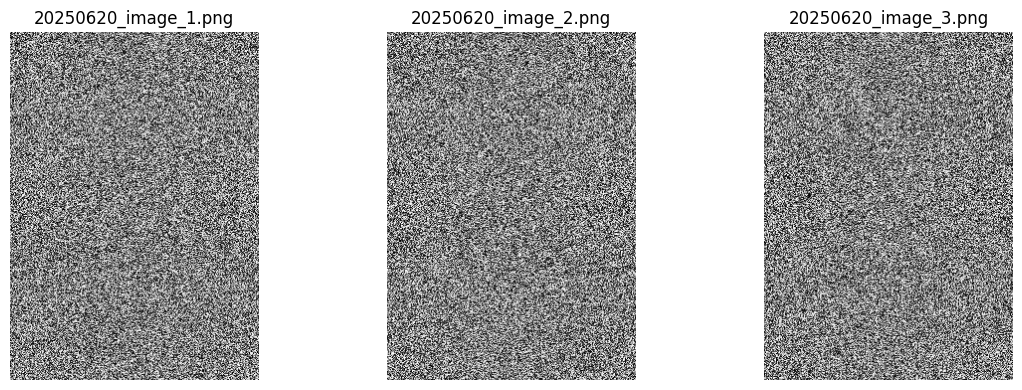

In [1]:
from PIL import Image
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A4
import matplotlib.pyplot as plt
import numpy as np
import os

# 📁 Configuration
prefix = "20250620_"
directory = f"{prefix}images"

# 📂 Create the directory if it doesn't exist
os.makedirs(directory, exist_ok=True)

# 🖼️ Generate and save 3 grayscale images into the directory
image_list = []
for i in range(3):
    # Create a random grayscale image (numpy array)
    img_array = np.random.randint(0, 255, (350, 250), dtype=np.uint8)
    img = Image.fromarray(img_array, mode='L')

    # Build filename with path
    filename = os.path.join(directory, f"{prefix}image_{i+1}.png")
    
    # Save image
    img.save(filename)
    image_list.append(filename)

# 📂 Get all PNG images with prefix from directory
image_list = sorted([
    os.path.join(directory, f)
    for f in os.listdir(directory)
    if f.startswith(prefix) and f.endswith(".png")
])

# 🛑 Check if no images found
if not image_list:
    raise FileNotFoundError(f"No PNG images with prefix '{prefix}' found in '{directory}'.")

# 🗂️ Create a PDF with the images
pdf_filename = f"{prefix}combined_output.pdf"
c = canvas.Canvas(pdf_filename, pagesize=A4)
width, height = A4

for image_path in image_list:
    img = Image.open(image_path)
    img.thumbnail((width, height))

    # Save temp version to extract dimensions
    temp_path = f"temp_{os.path.basename(image_path)}"
    img.save(temp_path)
    img_width, img_height = img.size
    x = (width - img_width) / 2
    y = (height - img_height) / 2
    c.drawImage(temp_path, x, y, width=img_width, height=img_height)
    c.showPage()
    os.remove(temp_path)

# 💾 Save final PDF
c.save()

# 📊 Optional: Preview all images
fig, axs = plt.subplots(1, len(image_list), figsize=(4 * len(image_list), 4))
if len(image_list) == 1:
    axs = [axs]

for ax, path in zip(axs, image_list):
    img = Image.open(path)
    ax.imshow(img, cmap='gray')
    ax.set_title(os.path.basename(path))
    ax.axis('off')

plt.tight_layout()
plt.show()
